In [1]:
import pandas as pd

### LOAD DATA

In [30]:
file_path = 'C:/Users/LENOVO X270/Documents/pkl/data_pkl_baru.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()

,Size,Style,Qty,Buy
0,WMS,FATBABY,300,"01 Buy, 21"
1,WMS,FATBABY,300,"01 Buy, 21"
2,WMS,ROUND UP,400,"01 Buy, 21"
3,WMS,ROUND UP,300,"01 Buy, 21"
4,WMS,HERITAGE,128,"01 Buy, 21"


In [6]:
df.describe()

,Qty
count,1366.000000
mean,997.684480
std,1617.652581
min,24.000000
25%,156.000000
50%,500.000000
75%,1200.000000
max,18804.000000


### PIE CHART

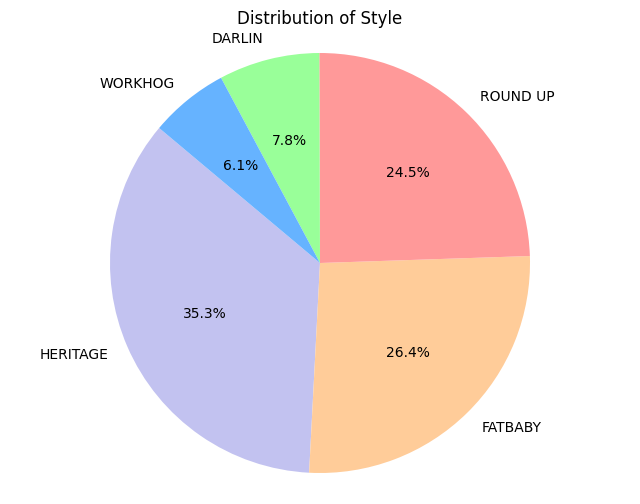

In [7]:
import matplotlib.pyplot as plt

# Data untuk pie chart
styles = df['Style'].value_counts()

# Label untuk tiap kategori
labels = ['HERITAGE', 'FATBABY', 'ROUND UP', 'DARLIN', 'WORKHOG']  # Sesuaikan urutan label dengan data

# Warna untuk tiap bagian pie chart
colors = ['#c2c2f0', '#ffcc99', '#ff9999', '#99ff99', '#66b3ff']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(styles, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Style')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


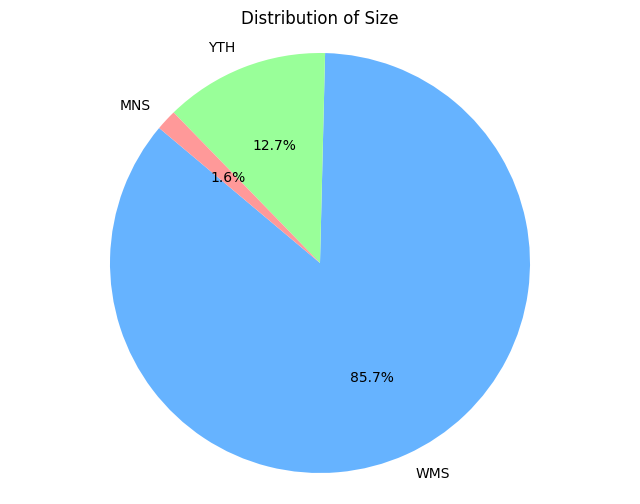

In [8]:
import matplotlib.pyplot as plt

# Data untuk pie chart
sizes = df['Size'].value_counts()

# Label untuk tiap kategori
labels = ['WMS', 'YTH', 'MNS']

# Warna untuk tiap bagian pie chart
colors = ['#66b3ff', '#99ff99', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### BAR PLOT

C:\Users\LENOVO X270\AppData\Local\Temp\ipykernel_11240\450199985.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Style', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None
C:\Users\LENOVO X270\AppData\Local\Temp\ipykernel_11240\450199985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Style', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None


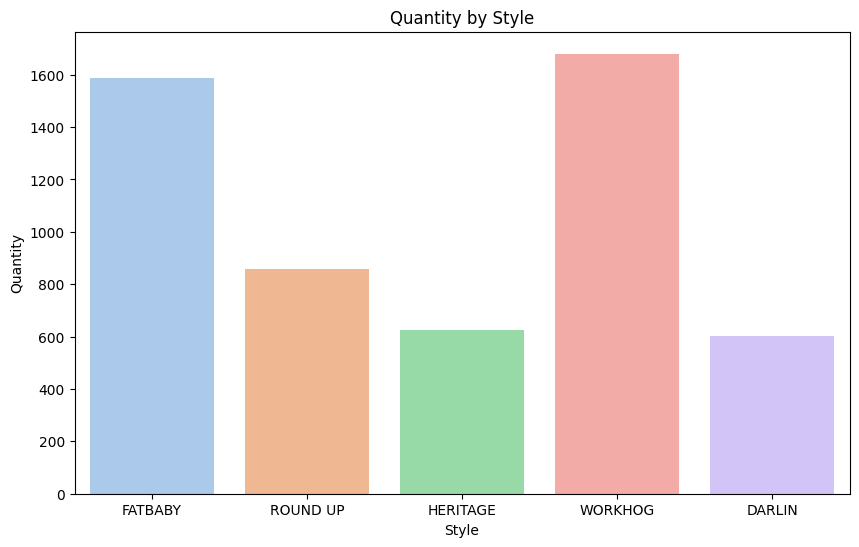

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Style', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None
plt.title('Quantity by Style')
plt.xlabel('Style')
plt.ylabel('Quantity')
plt.show()


C:\Users\LENOVO X270\AppData\Local\Temp\ipykernel_11240\2005306163.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Size', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None
C:\Users\LENOVO X270\AppData\Local\Temp\ipykernel_11240\2005306163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None


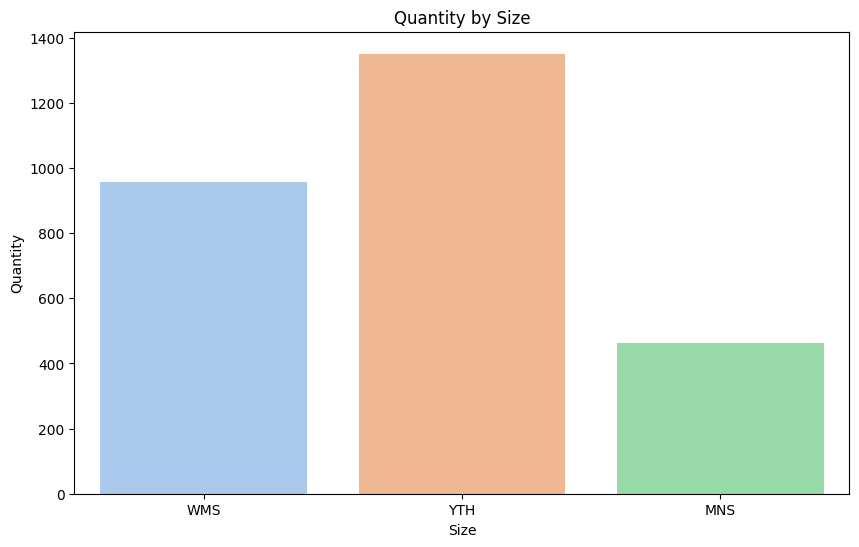

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='Qty', data=df, palette='pastel', ci=None)  # Menghapus garis dengan ci=None
plt.title('Quantity by Size')
plt.xlabel('Size')
plt.ylabel('Quantity')
plt.show()

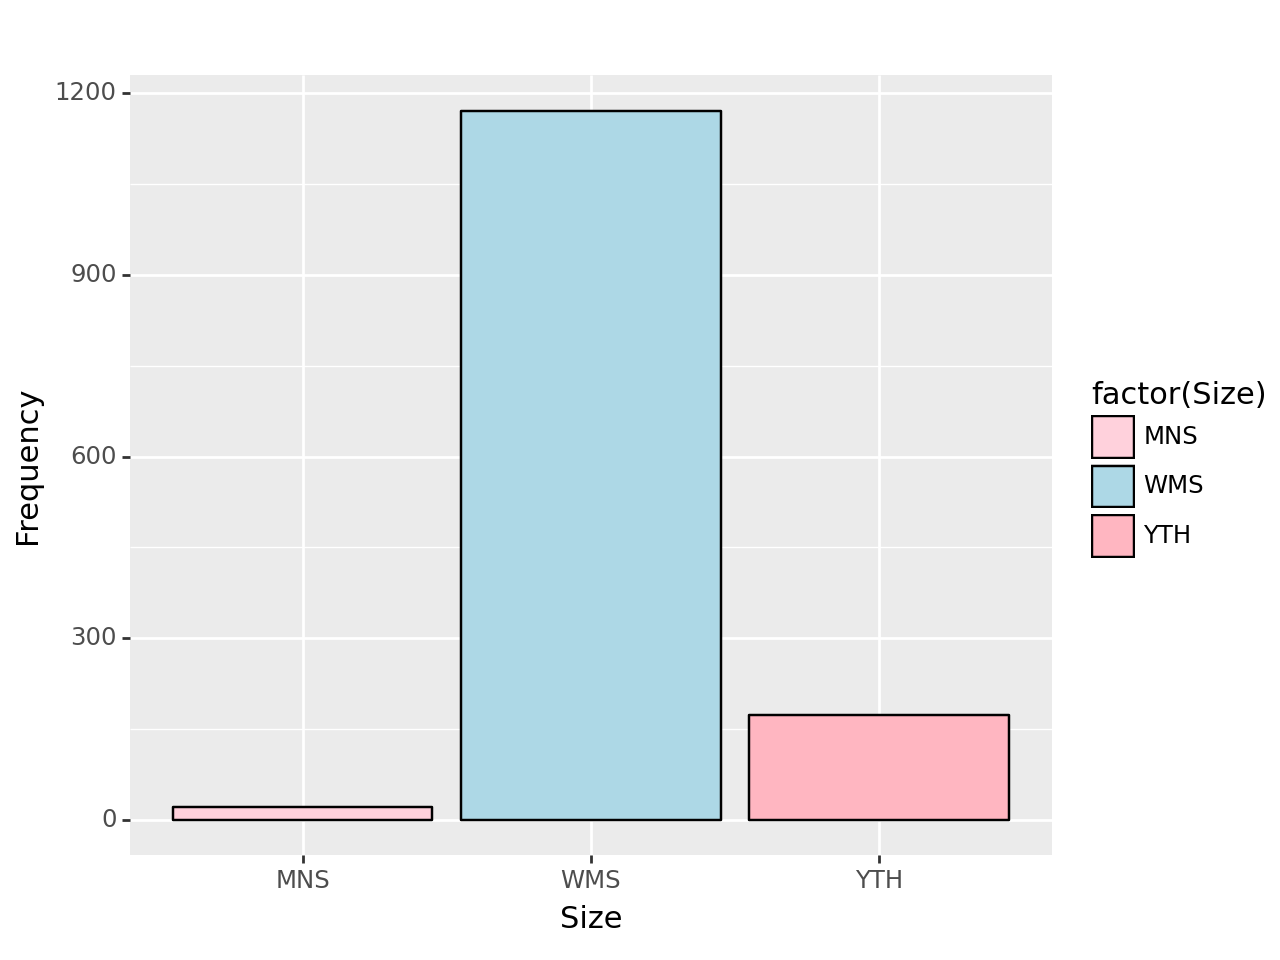

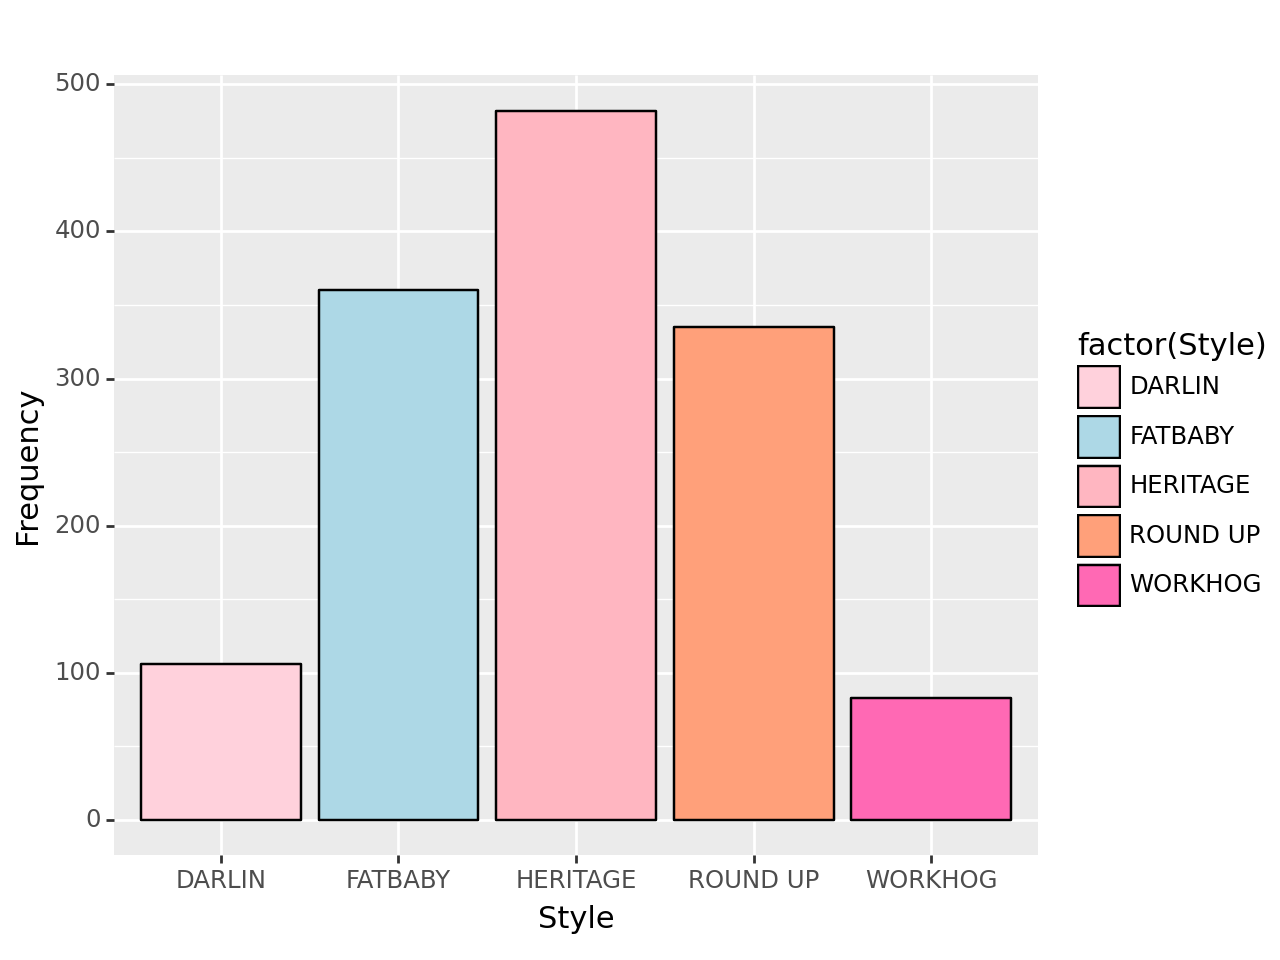

In [12]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, scale_fill_manual, labs

# Plot histogram untuk 'Size' dengan warna yang diubah
p_size = (ggplot(df, aes(x='factor(Size)', fill='factor(Size)')) +
          geom_bar(color='black') +
          scale_fill_manual(values=["#FFD1DC", "#ADD8E6", "#FFB6C1"]) +  # Ganti warna sesuai keinginan
          labs(title=" ", x="Size", y="Frequency"))

# Plot histogram untuk 'Style' dengan warna yang diubah
p_style = (ggplot(df, aes(x='factor(Style)', fill='factor(Style)')) +
           geom_bar(color='black') +
           scale_fill_manual(values=["#FFD1DC", "#ADD8E6", "#FFB6C1", "#FFA07A", "#FF69B4"]) +  # Ganti warna sesuai keinginan
           labs(title=" ", x="Style", y="Frequency"))

print(p_size)
print(p_style)


### Preprocessing

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Size     0
Style    0
Qty      0
Buy      0
dtype: int64


In [37]:
# encoding
size_categories = {'MNS': 0, 'YTH': 1, 'WMS': 2}
style_categories = {'FATBABY': 0, 'HERITAGE': 1, 'WORKHOG': 2, 'DARLIN': 3, 'ROUND UP': 4}
df['Size'] = df['Size'].map(size_categories).astype('category')
df['Style'] = df['Style'].map(style_categories).astype('category')


In [31]:
df['Buy'] = pd.to_datetime(df['Buy'], format='%m Buy, %y')
df['Month'] = df['Buy'].dt.month
df['Year'] = df['Buy'].dt.year
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df.head()

,Size,Style,Qty,Buy,Month,Year,YearMonth
0,WMS,FATBABY,300,2021-01-01,1,2021,2021-01
1,WMS,FATBABY,300,2021-01-01,1,2021,2021-01
2,WMS,ROUND UP,400,2021-01-01,1,2021,2021-01
3,WMS,ROUND UP,300,2021-01-01,1,2021,2021-01
4,WMS,HERITAGE,128,2021-01-01,1,2021,2021-01


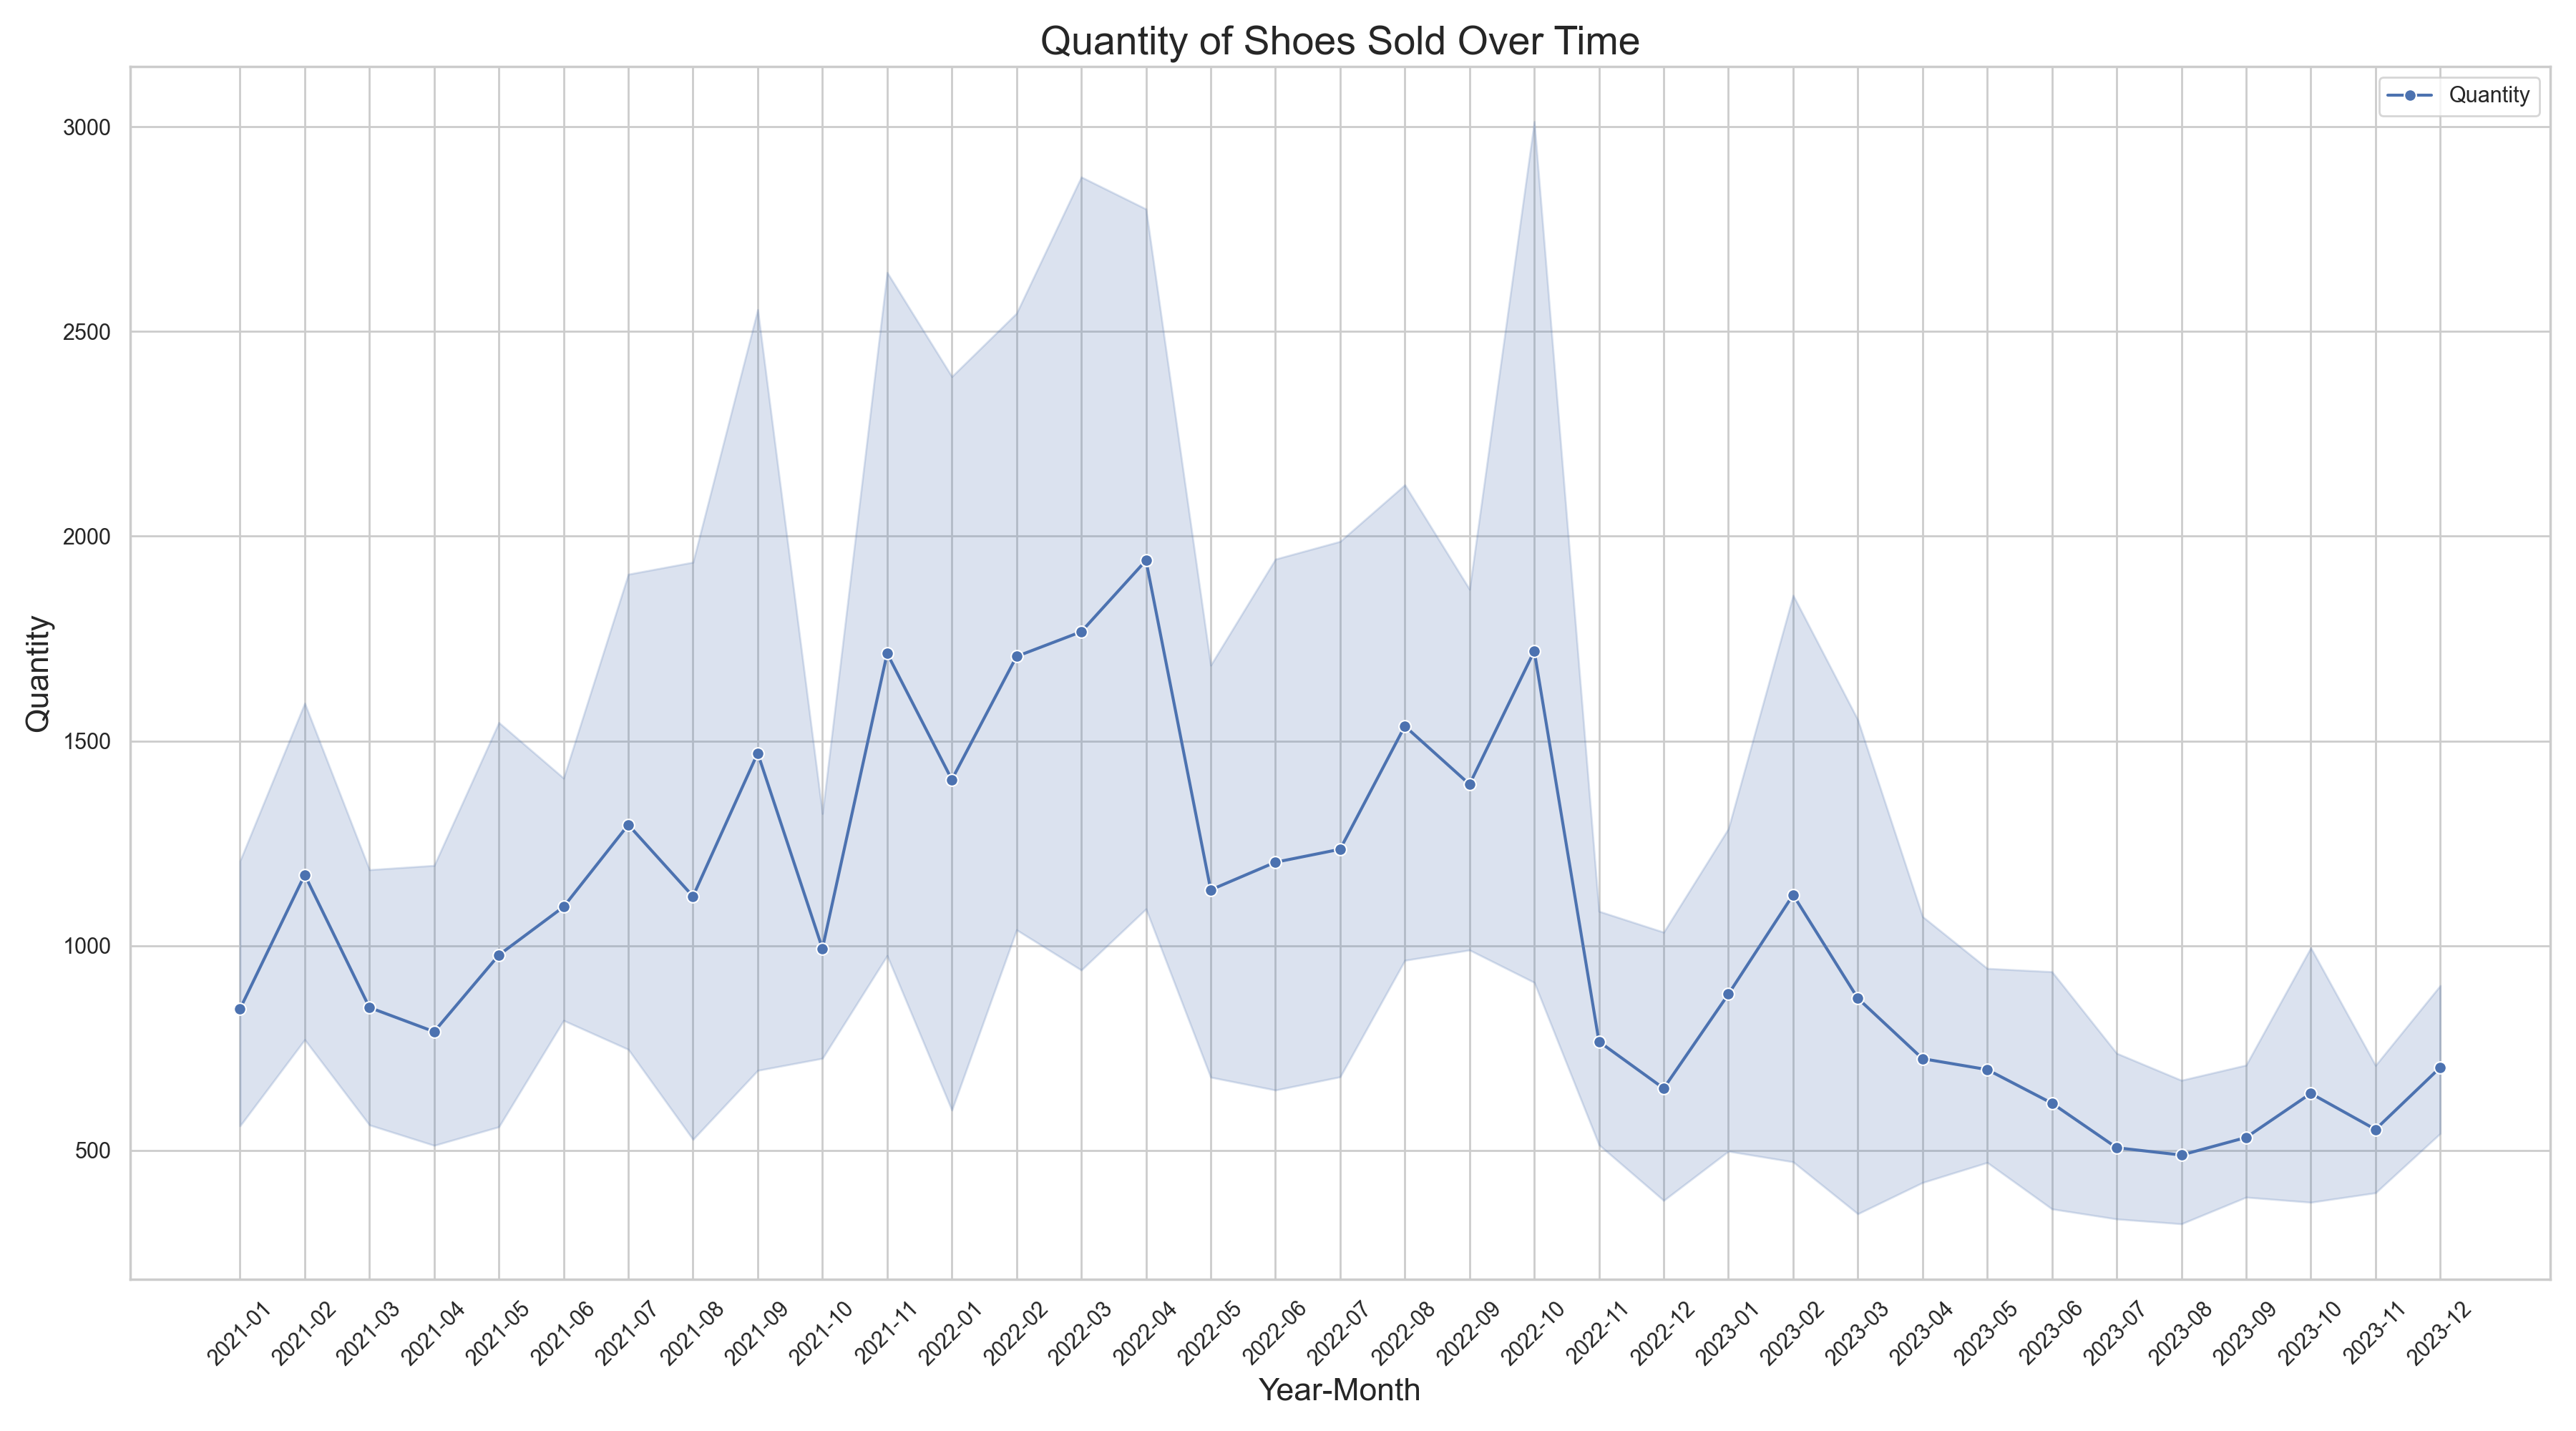

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Membuat line plot menggunakan seaborn
plt.figure(figsize=(18, 10))  # Mengatur ukuran gambar plot
sns.lineplot(x='YearMonth', y='Qty', data=df, marker='o', color='b', label='Quantity')  # Menggambar line plot

# Menambahkan judul dan label sumbu
plt.title('Quantity of Shoes Sold Over Time', fontsize=20)  # Menambahkan judul plot
plt.xlabel('Year-Month', fontsize=16)  # Menambahkan label pada sumbu x
plt.ylabel('Quantity', fontsize=16)  # Menambahkan label pada sumbu y

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan layout plot agar tidak tumpang tindih
plt.show()  # Menampilkan plot


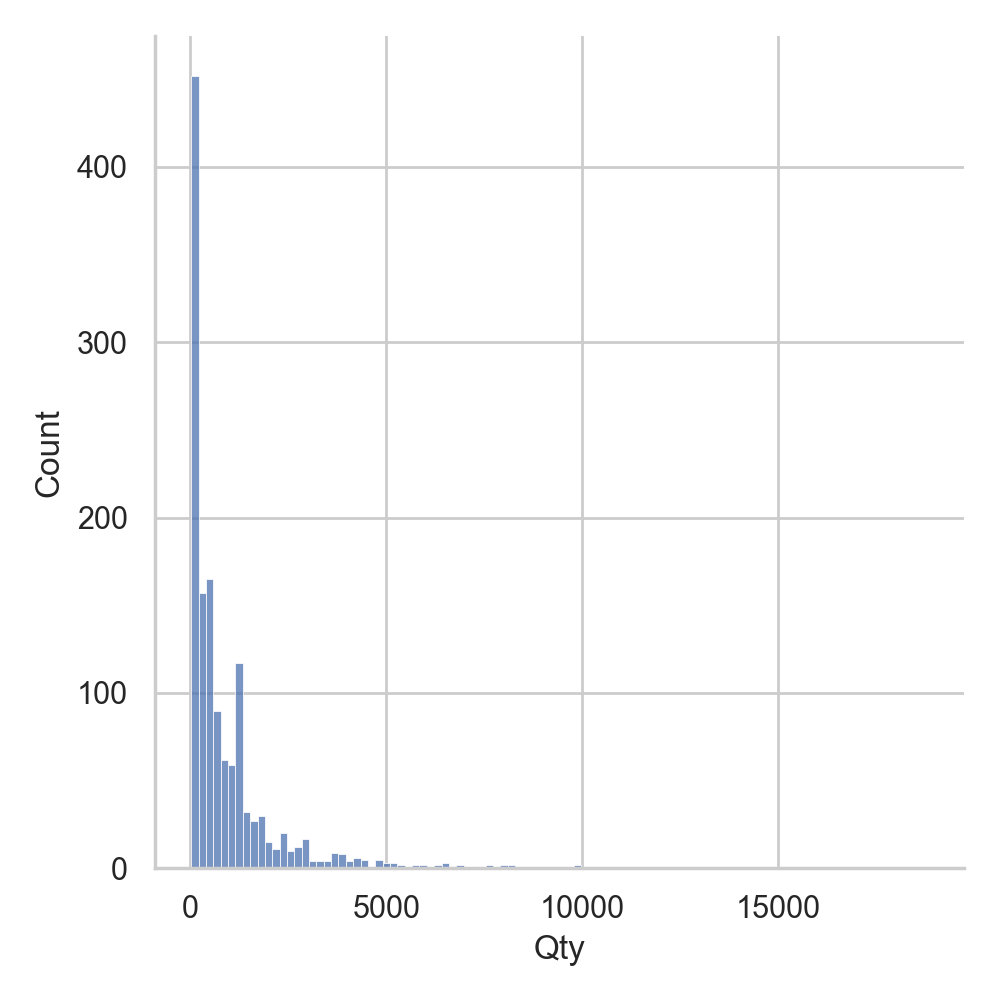

In [17]:
import seaborn as sns
sns.displot(df['Qty'])

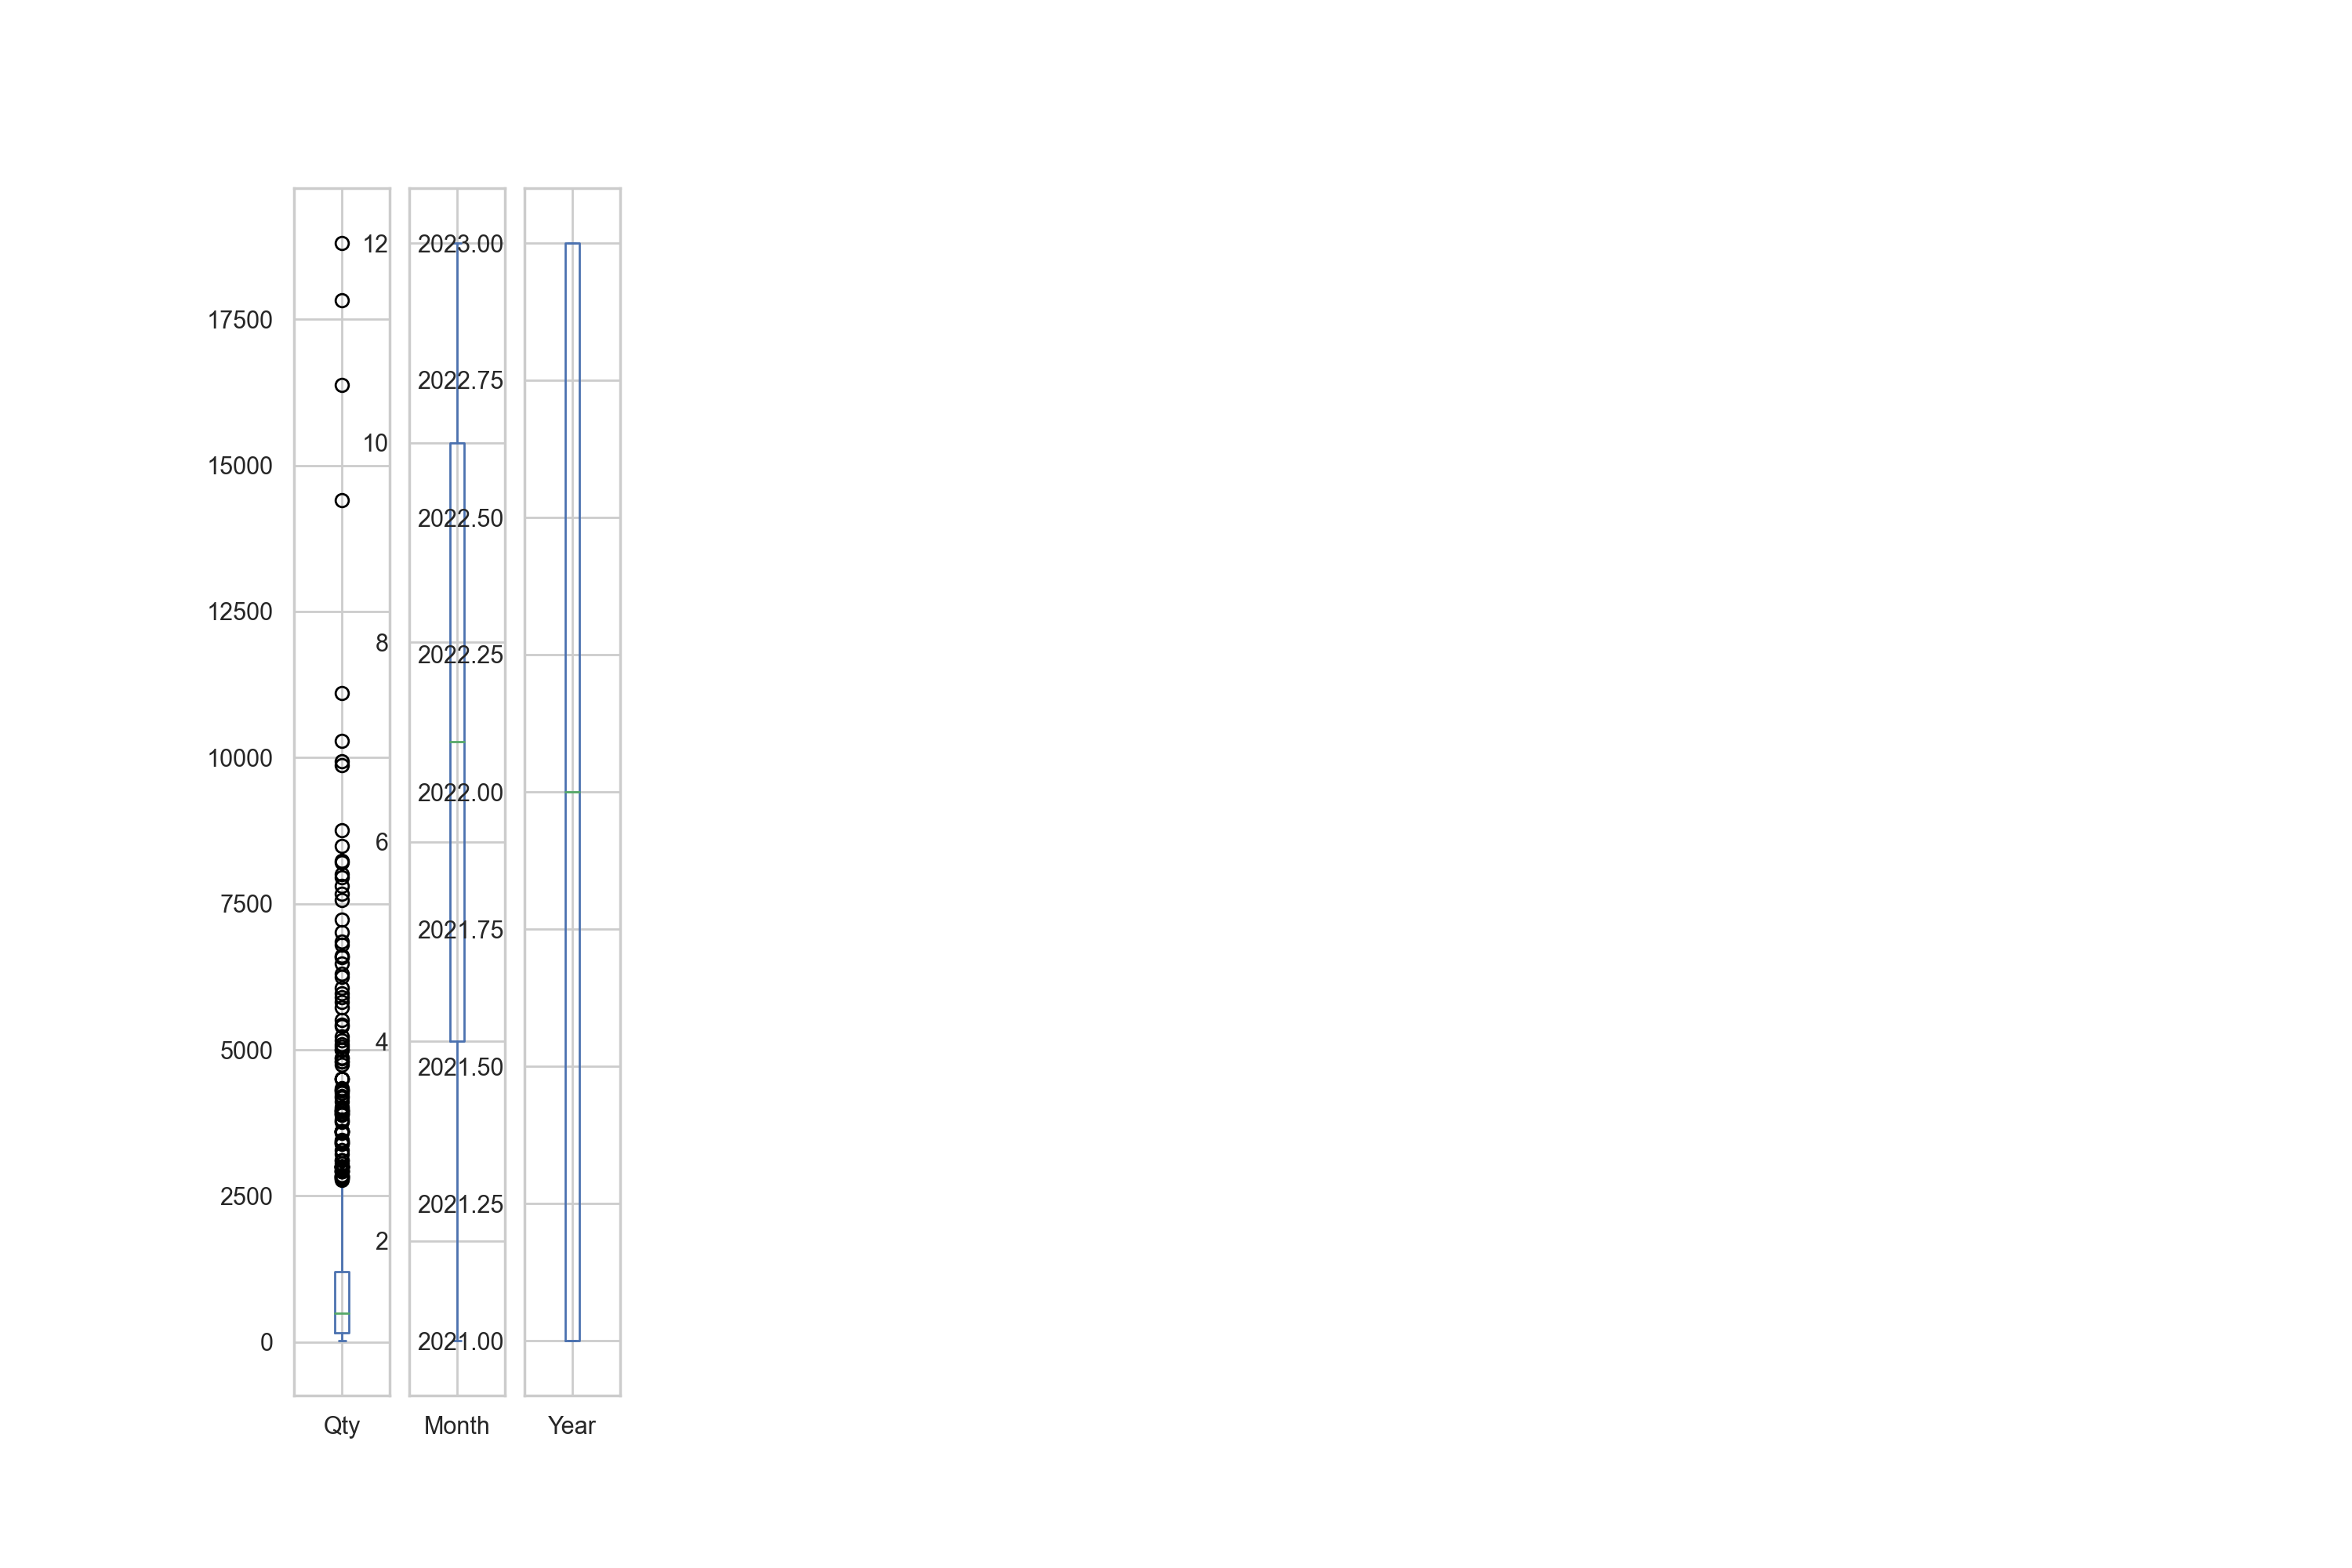

In [19]:
# cek outlier
df.plot(kind='box', subplots=True, layout=(1,16), sharex=False, figsize=(15,10))
plt.show()

In [32]:
import numpy as np
# Transformasi logaritmik pada kolom 'Qty'
df['Qty_transformed'] = np.log(df['Qty'])

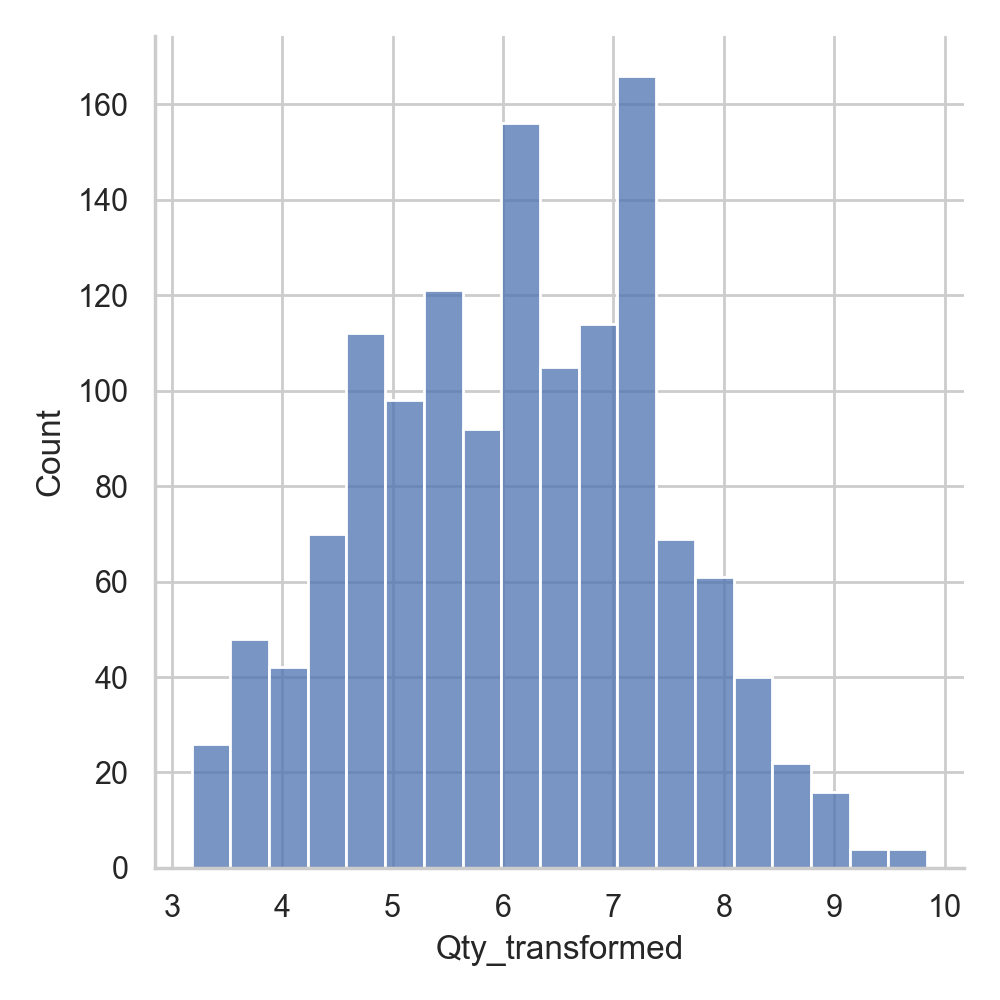

In [22]:
import seaborn as sns
sns.displot(df['Qty_transformed'])

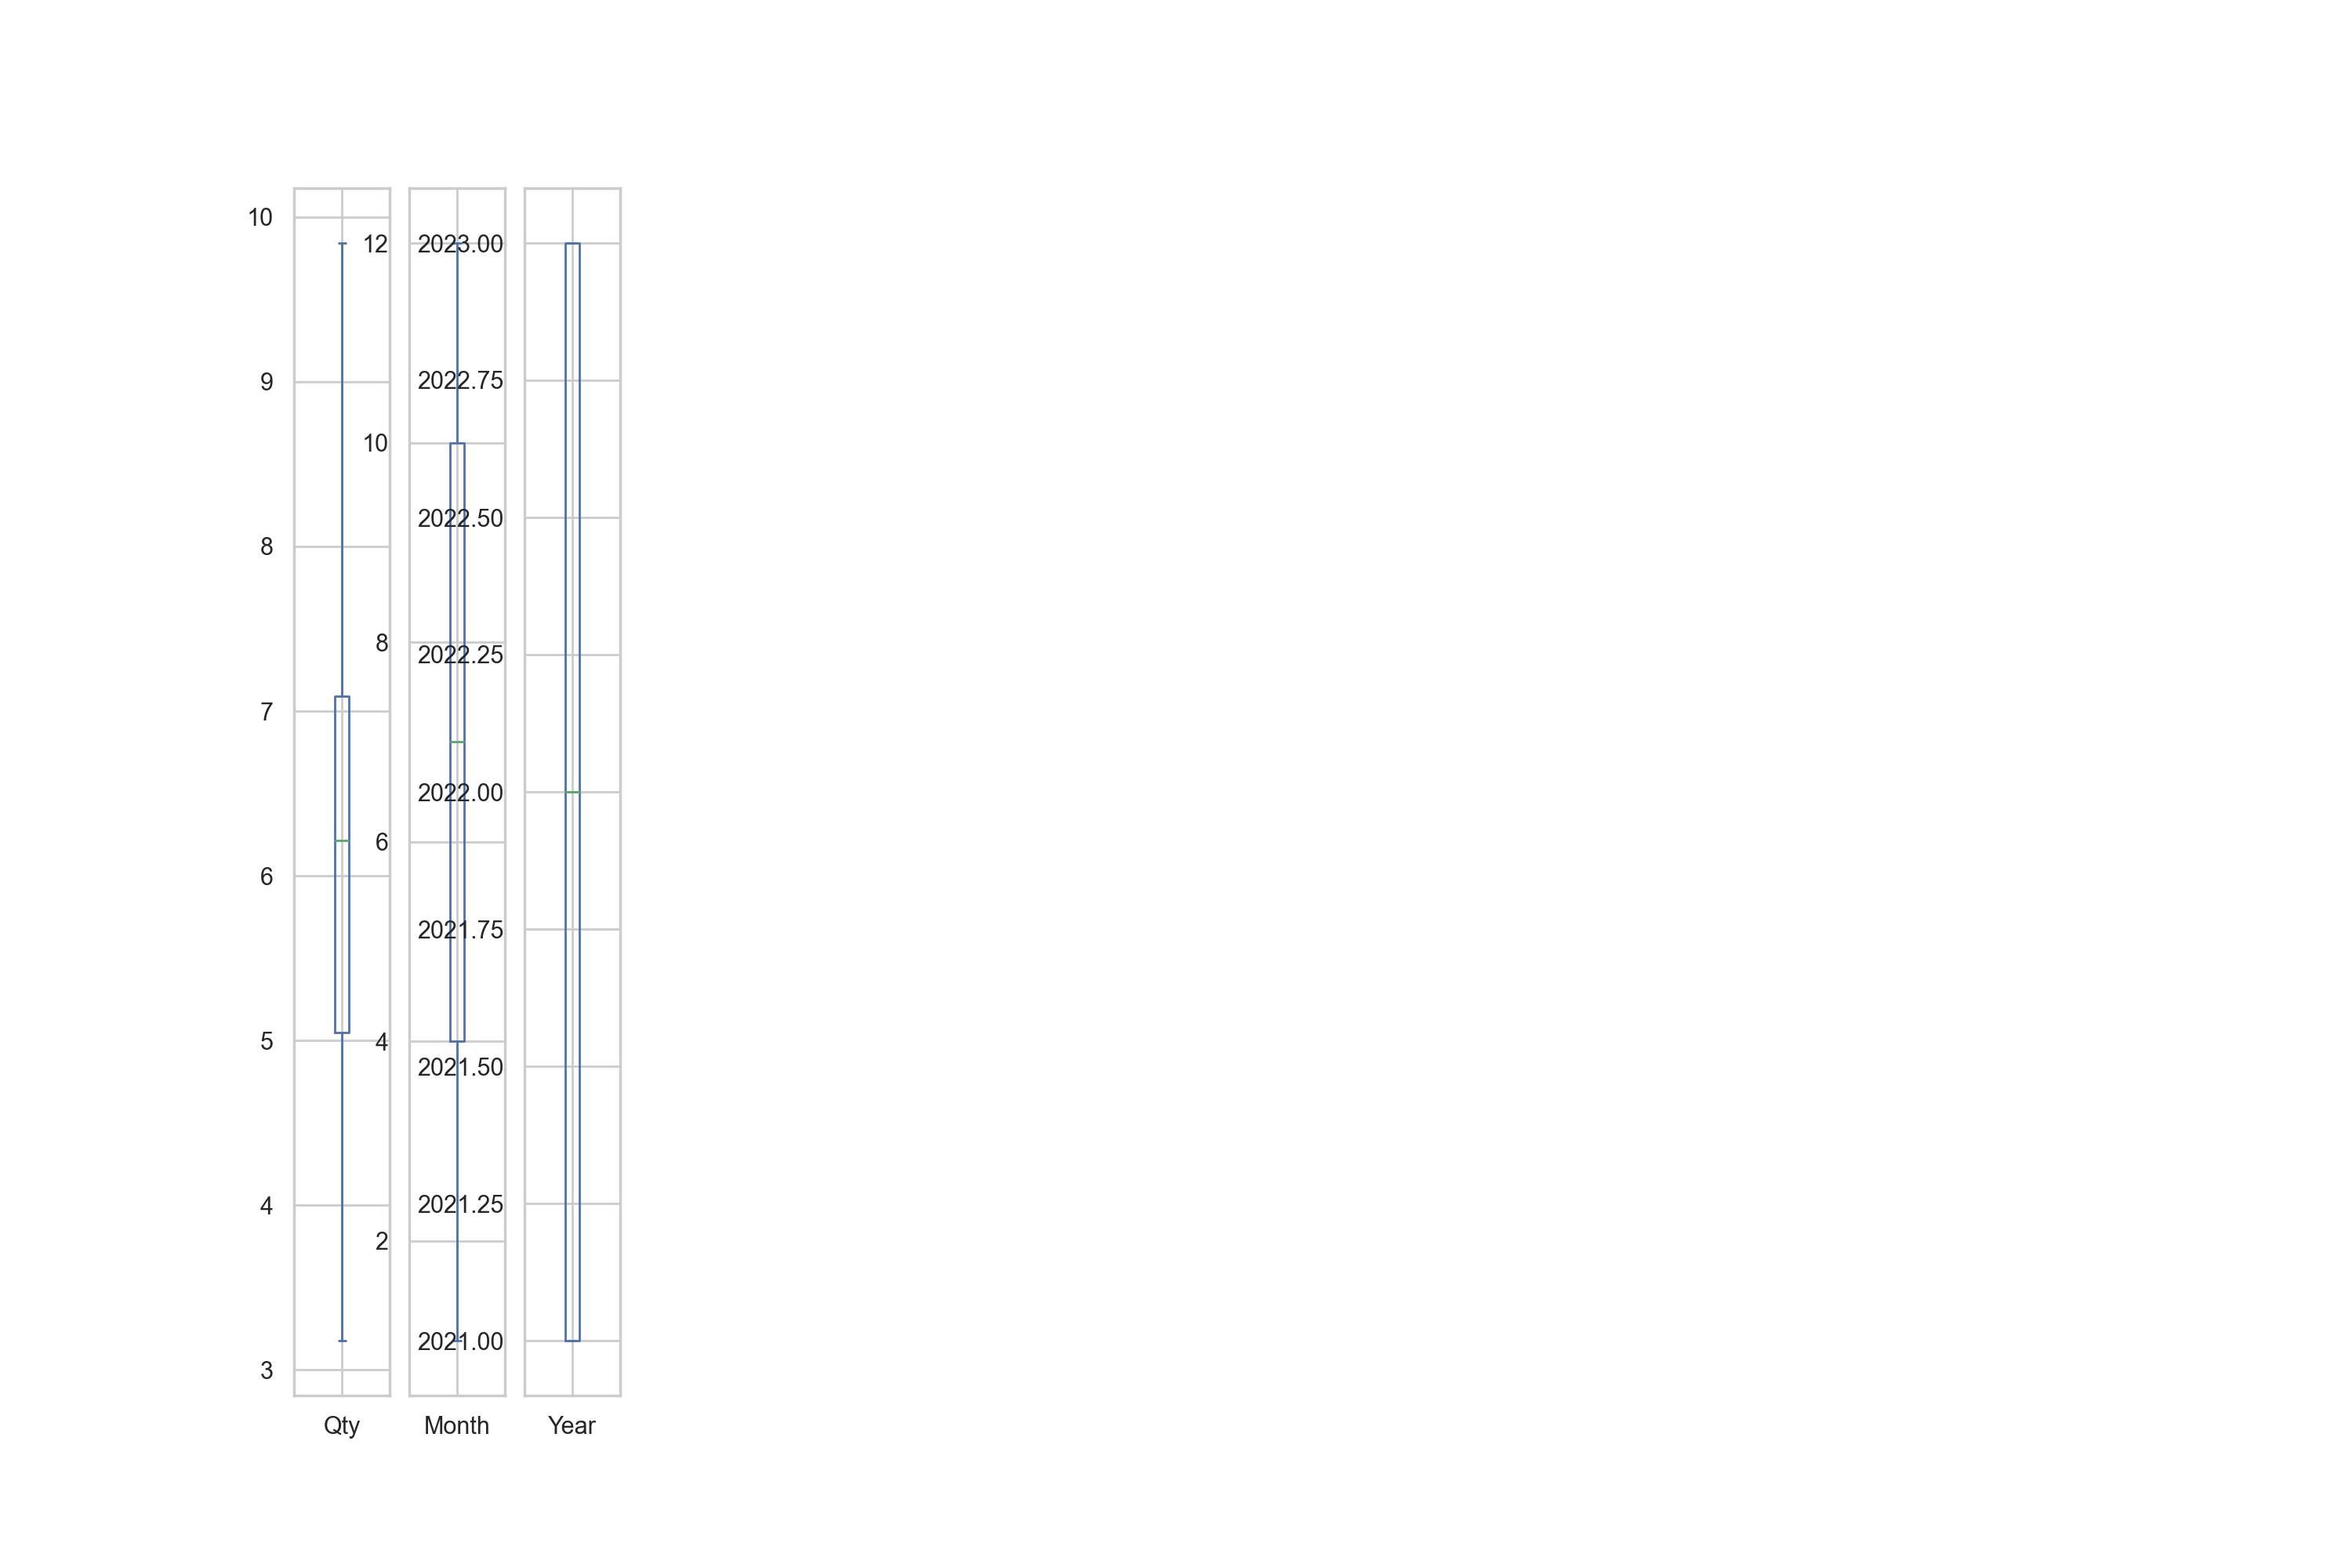

In [33]:
df['Qty'] = df['Qty_transformed']
df = df.drop('Qty_transformed', axis =1)
df.plot(kind='box', subplots=True, layout=(1,16), sharex=False, figsize=(15,10))
plt.show()

## OVERSAMPLING

In [34]:
columns_to_drop = ['YearMonth', 'Month', 'Year', 'Buy']
df = df.drop(columns_to_drop, axis =1)

In [40]:
# ------------ SIZE ------------
x = df.drop(columns = ["Size"]).values
y = df["Size"].values

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling
x_oversampled, y_oversampled = smote.fit_resample(x, y)

# Menampilkan informasi tentang bentuk dataset sebelum dan sesudah oversampling
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_oversampled))


Original dataset shape: Counter({2: 1171, 1: 173, 0: 22})
Resampled dataset shape: Counter({2: 1171, 1: 1171, 0: 1171})


In [42]:
df.to_csv('order baru.csv', index=False)

In [43]:
file_path = 'C:/Users/LENOVO X270/Documents/pkl/order baru.csv'

try:
    df1 = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df1 = pd.read_csv(file_path, encoding='ISO-8859-1')


In [45]:
size_categories = {'MNS': 0, 'YTH': 1, 'WMS': 2}
style_categories = {'FATBABY': 0, 'HERITAGE': 1, 'WORKHOG': 2, 'DARLIN': 3, 'ROUND UP': 4}
df1['Size'] = df1['Size'].map(size_categories).astype('category')
df1['Style'] = df1['Style'].map(style_categories).astype('category')


In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Definisikan variabel prediktor (X) dan variabel target (y)
y = df1['Qty']
X = df1.drop(columns=['Qty'])

# Inisialisasi model Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Inisialisasi RFE dengan memilih 20 fitur terbaik
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Melatih RFE pada data
rfe.fit(X, y)

# Menampilkan hasil seleksi fitur
print("Selected features:", rfe.support_)
print("Ranking of features:", rfe.ranking_)


Selected features: [ True  True]
Ranking of features: [1 1]


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
X = df1[['Size', 'Style']]
y = df1['Qty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Random Forest):", mse)
r_squared = r2_score(y_test, y_pred)
print("R-squared (Random Forest):", r_squared)


Mean Squared Error (Random Forest): 0.0
R-squared (Random Forest): 1.0


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_feature_importances = rf_model.feature_importances_
print("Skor Importance dari Random Forest Regressor:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {rf_feature_importances[i]}")
    
# Training model regresi linear (OLS)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Prediksi dengan model OLS
y_pred_ols = ols_model.predict(X_test)

# Menghitung Mean Squared Error (MSE) untuk model OLS
mse_ols = mean_squared_error(y_test, y_pred_ols)

# Menampilkan skor importance dari Random Forest Regressor
print("Skor Importance dari Random Forest Regressor:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {rf_feature_importances[i]}")


Skor Importance dari Random Forest Regressor:
Size: 0.7481324349021988
Style: 0.2518675650978013
Skor Importance dari Random Forest Regressor:
Size: 0.7481324349021988
Style: 0.2518675650978013


In [50]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Qty   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.388e+06
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:19:18   Log-Likelihood:                -1319.6
No. Observations:                3000   AIC:                             2645.
Df Residuals:                    2997   BIC:                             2663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.4532      0.015    2.5e+04      0.0

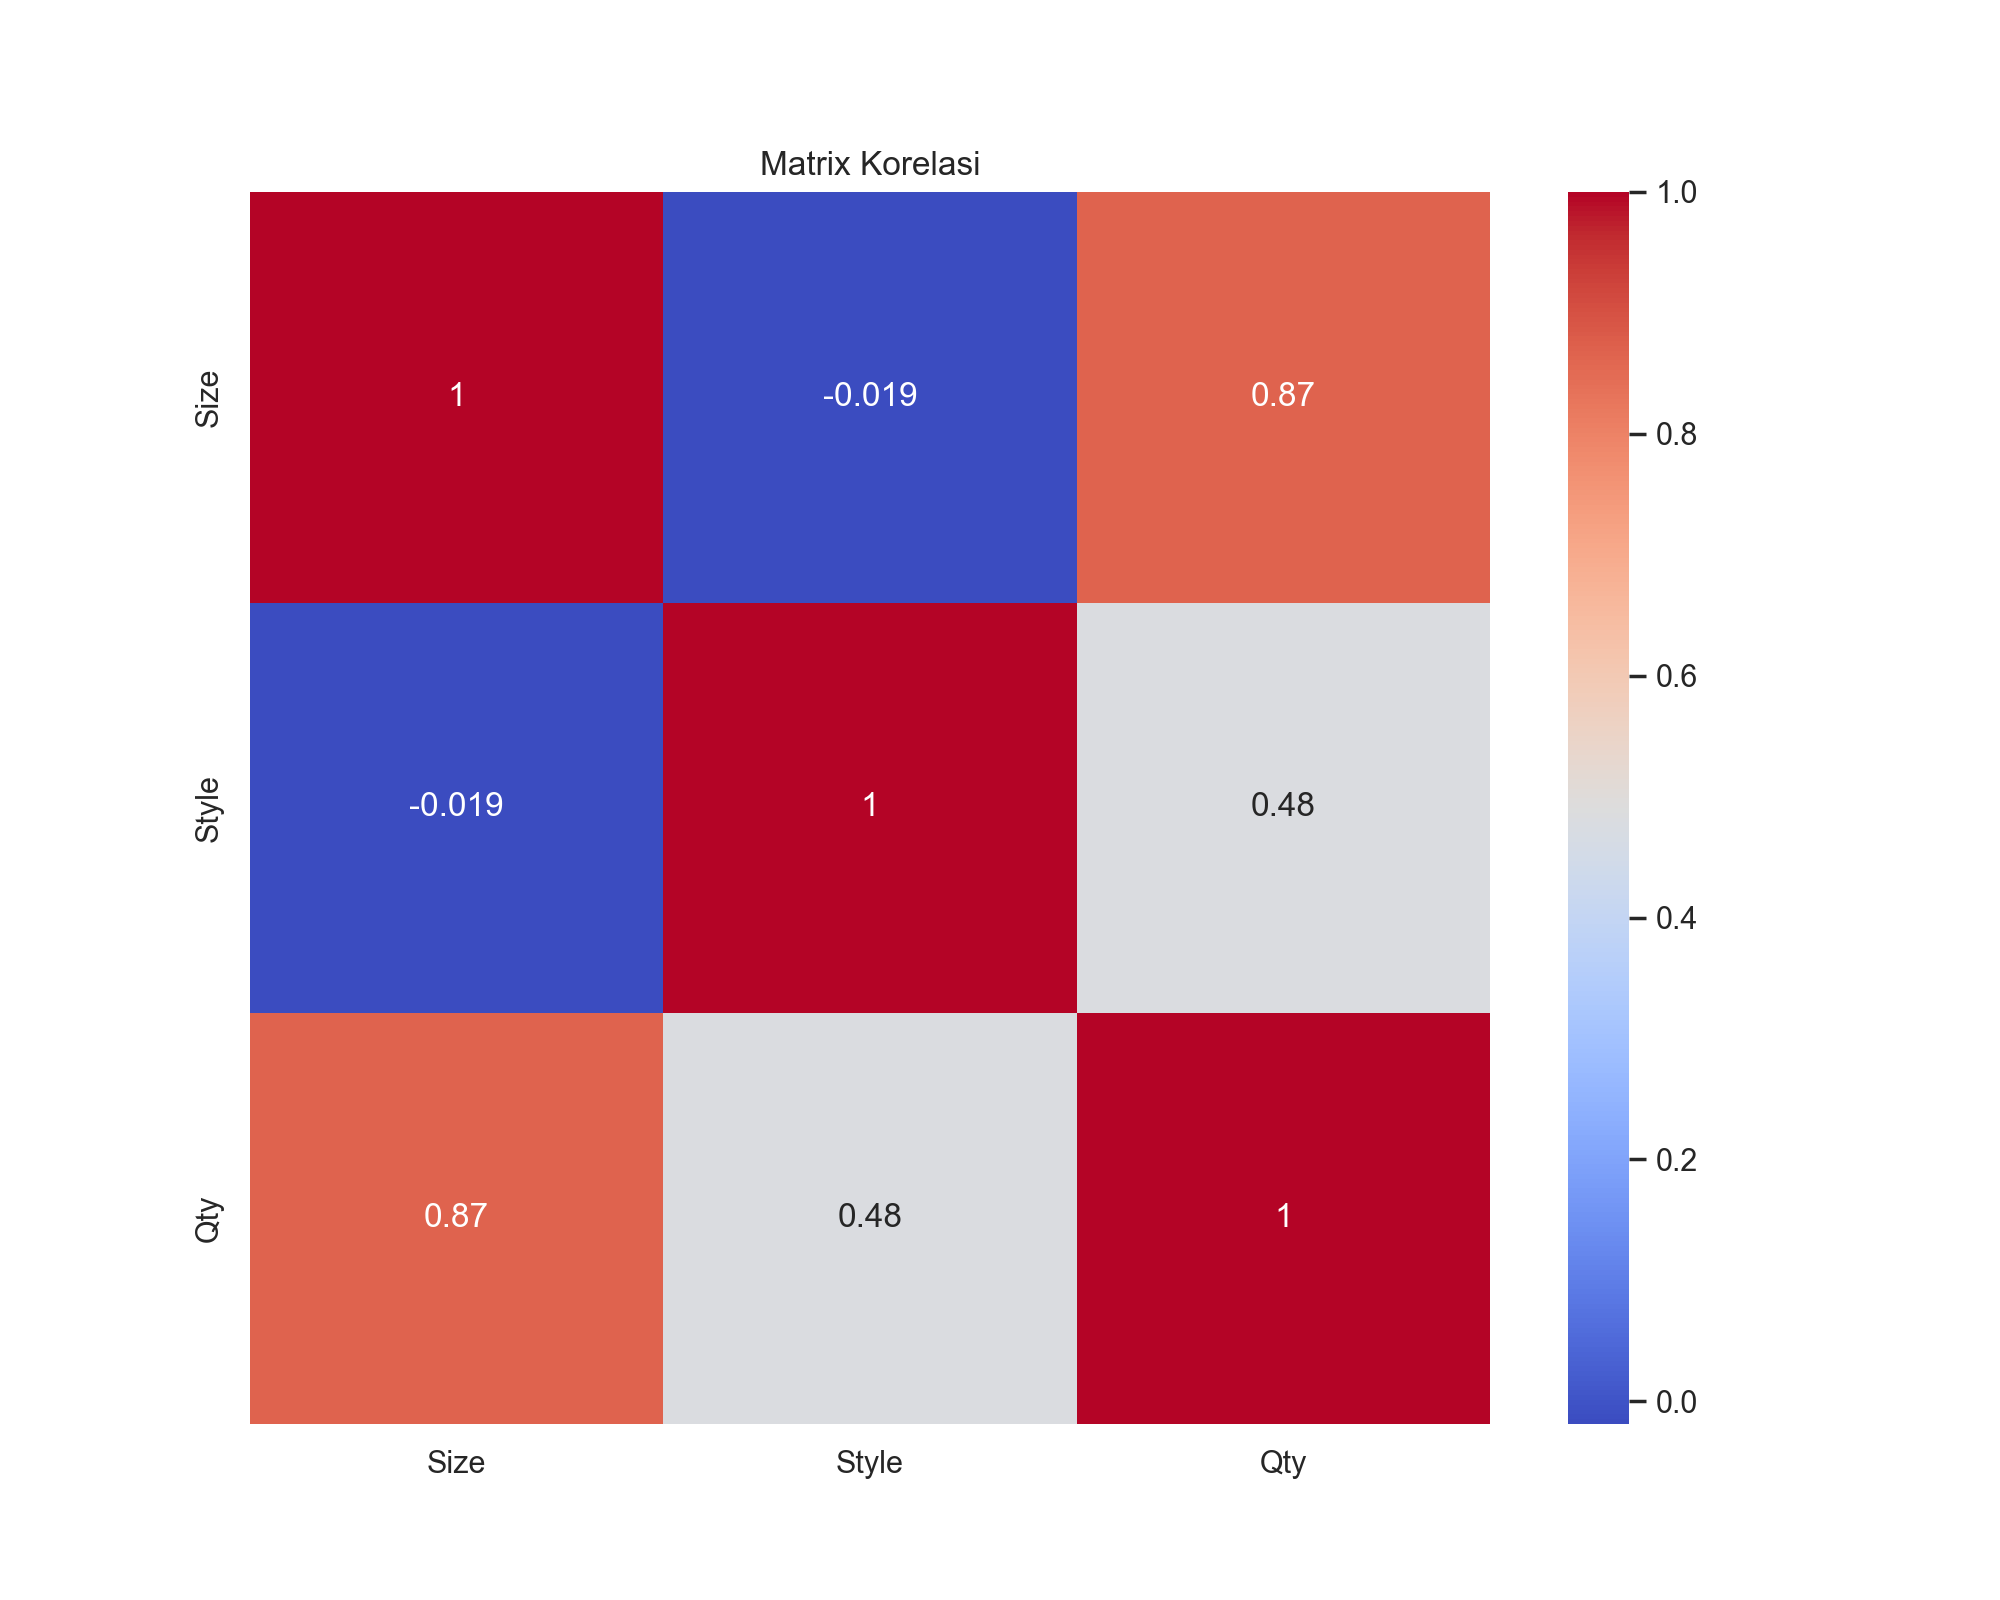

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi dengan heatmap
correlation_matrix_smote = df1.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_smote, annot=True, cmap='coolwarm')
plt.title('Matrix Korelasi')
plt.show()